Status 200, OK
[{'cars': '54347', 'year': 1970},
 {'cars': '61394', 'year': 1971},
 {'cars': '64803', 'year': 1972},
 {'cars': '67261', 'year': 1973},
 {'cars': '68046', 'year': 1974},
 {'cars': '67532', 'year': 1975},
 {'cars': '69776', 'year': 1976},
 {'cars': '73169', 'year': 1977},
 {'cars': '77022', 'year': 1978},
 {'cars': '80537', 'year': 1979},
 {'cars': '83606', 'year': 1980},
 {'cars': '84003', 'year': 1981},
 {'cars': '83828', 'year': 1982},
 {'cars': '84225', 'year': 1983},
 {'cars': '85131', 'year': 1984},
 {'cars': '85940', 'year': 1985},
 {'cars': '87574', 'year': 1986},
 {'cars': '89127', 'year': 1987},
 {'cars': '92974', 'year': 1988},
 {'cars': '95176', 'year': 1989},
 {'cars': '99194', 'year': 1990},
 {'cars': '100075', 'year': 1991},
 {'cars': '101065', 'year': 1992},
 {'cars': '103731', 'year': 1993},
 {'cars': '105335', 'year': 1994},
 {'cars': '105894', 'year': 1995},
 {'cars': '106254', 'year': 1996},
 {'cars': '106187', 'year': 1997},
 {'cars': '104839', 'year'

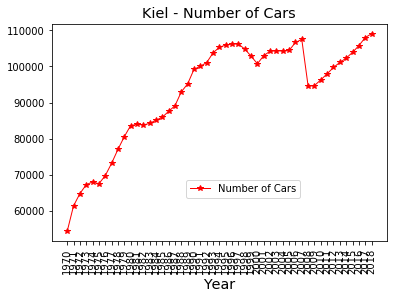

In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint

URL = 'https://ploenerseite.de/api/cars'

### fetch data using requests ###

# This part is not really necessary.
# It's only here to show a different way to fetch json data.

def fetchJsonData(url):
    try:
        response = requests.get(url)
    except OSError:
        print('No connection to the server!')
        return None

    # check if the request is successful
    if response.status_code == 200:
        print('Status 200, OK')
        return response.json()
    else:
        print('JSON data request not successful!.')
        return None

json_data = fetchJsonData(URL)
pprint(json_data)

### fetch data using pandas ###

# Fetch JSON data from a given url
df = pd.read_json(URL, orient='columns')

# View the first ten rows
df.head(10)

### plot the received data ###

# create a subplot
fig, ax = plt.subplots()

# drop not available (na) data
df_cleaned = df.dropna(how='all')

x = df_cleaned['year'].values
y = df_cleaned['cars'].values

plt.title("Kiel - Number of Cars", size="x-large")
plt.ylabel("", size="x-large")
plt.xlabel("Year", size="x-large")

plt.plot(y, "r*-", markersize=6, linewidth=1, color='r', label="Number of Cars")

plt.legend(loc=(0.4, 0.2))

ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation='vertical')

plt.show()